In [15]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
import os

The raw shape is (128, 128)


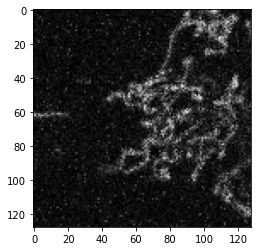

In [7]:
# Load the tif file and check its shape
image = Image.open('/Users/wenyuzhang/Downloads/2_Mitotracker_U2OS_cells_image/mitotracker_PSSR-SF_train_lr_0001.tif')
print(f'The raw shape is {np.array(image).shape}')
plt.imshow(image, cmap='gray')
plt.show()

After greyscale, the shape is (128, 128)


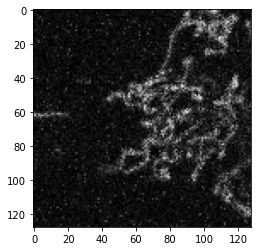

In [8]:
# Convert the raw image to the 2-dim image by merging the color channels
img_gray = image.convert('L')
print(f'After greyscale, the shape is {np.array(img_gray).shape}')
plt.imshow(img_gray, cmap='gray')
plt.show()

### Crop the image to 128*128

In [9]:
raw_array = np.array(img_gray)
out_array = raw_array[:128, :128]
out_array.shape

(128, 128)

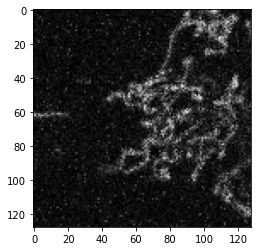

In [10]:
plt.imshow(out_array, cmap='gray')
plt.show()

In [42]:
out_vector = out_array.flatten()
len(out_vector)

16384

In [12]:
type(out_vector)

numpy.ndarray

In [56]:
def transfer(image_path):
    image = Image.open(image_path)
    img_gray = image.convert('L')
    raw_array = np.array(img_gray)
#     print(raw_array.shape)
#     if len(raw_array) != 128:
#         plt.imshow(raw_array, cmap='gray')
#         plt.show()
    out_array = raw_array[:128, :128]
    out_vector = out_array.flatten()
    return out_vector


In [57]:
def process_folder(folder_path):
    # Initialize an empty list to hold all image vectors
    images_list = []

    # Loop through each file in the folder
#     stop = 0
    for filename in os.listdir(folder_path):
#         stop +=1
        if filename.endswith(".tif"):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            
            # Apply the transfer function and add the result to the list
            image_vector = transfer(file_path)
            if len(image_vector) == 16384:
#             print(image_vector.shape)
                images_list.append(image_vector)

    # Convert the list of vectors to a numpy matrix
    # Ensure each image_vector is a flat array of shape (16384,)
#     images_matrix = np.vstack(images_list) if images_list else np.array([], dtype=np.uint8).reshape(0, 16384)
    
    return np.array(images_list)



# Save the matrix to a file
# np.save('images_matrix.npy', images_matrix)


folder_path = '/Users/wenyuzhang/Downloads/2_Mitotracker_U2OS_cells_image/'
image_arr = process_folder(folder_path)

In [58]:
image_arr.shape

(3589, 16384)

In [59]:
image_arr

array([[ 22, 120,  71, ...,  76,  17,   6],
       [ 16,   0,   9, ...,   1,   1,   2],
       [  4,   2,   4, ...,   3,   2,   3],
       ...,
       [  2,   0,   8, ..., 108,  57,   4],
       [  9,   5,   8, ...,   3,   0,   0],
       [ 15,  65,  67, ...,  10,  10,   8]], dtype=uint8)

In [62]:
output_filename = '/Users/wenyuzhang/Downloads/2_Mitotracker_U2OS_cells_image.csv'
    
# Save the array to a CSV file
np.savetxt(output_filename, image_arr, delimiter=',', fmt='%d')    


In [64]:
folder_path1= '/Users/wenyuzhang/Downloads/1_EM_neural_tissue_image/'
images_M1 = process_folder(folder_path1)
   
images_M1.shape

(5400, 16384)

In [66]:
output_file1 = '/Users/wenyuzhang/Downloads/1_EM_neural_tissue_image.csv'
    
# Save the array to a CSV file
np.savetxt(output_file1, images_M1, delimiter=',', fmt='%d') 